# Decision Tree Classifier

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.5 MB/s eta 0:00:00
time: 434 µs (started: 2024-01-08 17:00:35 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 26.1 s (started: 2024-01-08 17:00:35 +00:00)


In [ ]:
datasets=[]
models=[]
for i in range(0,70):
  df=pd.read_csv(f'/content/drive/MyDrive/CSE_4554_ML_PROJECT/datasets/dataset{i}.csv')
  datasets.append(df)

time: 1min 48s (started: 2024-01-08 17:01:01 +00:00)


In [ ]:
for i in range(len(datasets)):
  datasets[i]=datasets[i].drop(['filename','Unnamed: 0'],axis=1)

time: 863 ms (started: 2024-01-08 17:02:50 +00:00)


In [ ]:
models=[]
for i in range(len(datasets)):
  models.append(make_pipeline(StandardScaler(), DecisionTreeClassifier()))

time: 1.67 ms (started: 2024-01-08 17:02:51 +00:00)


In [ ]:
X_train=[]
y_train=[]

time: 1.37 ms (started: 2024-01-08 17:02:51 +00:00)


In [ ]:
for i in range(len(datasets)):
  X_train.append(datasets[i].drop(['Bug Present'],axis=1).values)
  y_train.append(datasets[i]['Bug Present'].values)

time: 939 ms (started: 2024-01-08 17:02:51 +00:00)


In [ ]:
for i in range(len(datasets)):
  models[i].fit(X_train[i],y_train[i])

time: 1min 51s (started: 2024-01-08 17:02:52 +00:00)


# Performance Metrics

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

param_grid = {}
dtree = DecisionTreeClassifier()
grid_search=[]
epochs=len(datasets)
for i in range(epochs):
    print(f'{i}th model: ')
    grid_search_tmp = GridSearchCV(dtree, param_grid, scoring='accuracy', cv=10)
    grid_search_tmp.fit(StandardScaler().fit(X_train[i]).transform(X_train[i]), y_train[i])
    grid_search.append(grid_search_tmp)
    print("Progress=",(i/epochs)*100)



0th model: 
Progress= 0.0
1th model: 
Progress= 1.4285714285714286
2th model: 
Progress= 2.857142857142857
3th model: 
Progress= 4.285714285714286
4th model: 
Progress= 5.714285714285714
5th model: 
Progress= 7.142857142857142
6th model: 
Progress= 8.571428571428571
7th model: 
Progress= 10.0
8th model: 
Progress= 11.428571428571429
9th model: 
Progress= 12.857142857142856
10th model: 
Progress= 14.285714285714285
11th model: 
Progress= 15.714285714285714
12th model: 
Progress= 17.142857142857142
13th model: 
Progress= 18.571428571428573
14th model: 
Progress= 20.0
15th model: 
Progress= 21.428571428571427
16th model: 
Progress= 22.857142857142858
17th model: 
Progress= 24.285714285714285
18th model: 
Progress= 25.71428571428571
19th model: 
Progress= 27.142857142857142
20th model: 
Progress= 28.57142857142857
21th model: 
Progress= 30.0
22th model: 
Progress= 31.428571428571427
23th model: 
Progress= 32.857142857142854
24th model: 
Progress= 34.285714285714285
25th model: 
Progress= 3

In [ ]:
from sklearn.metrics import accuracy_score

time: 3.23 ms (started: 2024-01-08 17:20:24 +00:00)


In [ ]:
test_set=pd.read_csv(f'/content/drive/MyDrive/CSE_4554_ML_PROJECT/datasets/test_set.csv')
test_set=test_set.drop(['filename','Unnamed: 0'],axis=1)
X_test,y_test=test_set.drop(['Bug Present'],axis=1).values,test_set['Bug Present'].values
y_test_pred=[]
for i in range(len(datasets)):
  y_pred=models[i].predict(X_test)
  y_test_pred.append(y_pred)




time: 1.86 s (started: 2024-01-08 17:20:24 +00:00)


In [ ]:
result = []
y_test_pred=np.array(y_test_pred)
for column in y_test_pred.T:
    most_common = np.bincount(column).argmax()
    result.append(most_common)

result = np.array(result)

time: 94 ms (started: 2024-01-08 17:20:26 +00:00)


In [ ]:
print("Accuracy on Test Set: ", accuracy_score(result,y_test)*100)

Accuracy on Test Set:  76.02637736651776
time: 5.02 ms (started: 2024-01-08 17:20:26 +00:00)


In [ ]:
result

array([0, 0, 0, ..., 1, 1, 1])

time: 5.61 ms (started: 2024-01-08 17:20:26 +00:00)


In [ ]:
test_accuracy=[]
for i in range(epochs):
    test_accuracy.append(grid_search[i].score(StandardScaler().fit(X_test).transform(X_test), y_test))
print("Accuracy with 10-fold Cross Validation: ",sum(test_accuracy)/epochs*100)

Accuracy with 10-fold Cross Validation:  64.70112741969793
time: 1.26 s (started: 2024-01-08 17:20:26 +00:00)


In [ ]:
from sklearn.metrics import roc_curve,auc

time: 527 µs (started: 2024-01-08 17:20:27 +00:00)


In [ ]:
fpr,tpr, _ = roc_curve(y_test, result)
roc_auc = auc(fpr,tpr)

time: 8.5 ms (started: 2024-01-08 17:20:27 +00:00)


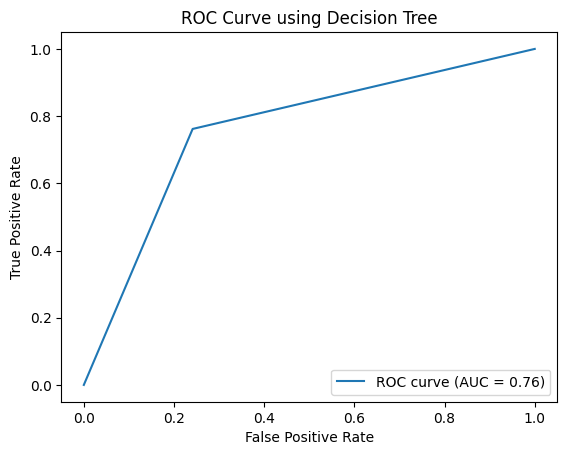

time: 469 ms (started: 2024-01-08 17:20:27 +00:00)


In [ ]:
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

time: 266 ms (started: 2024-01-08 17:20:28 +00:00)


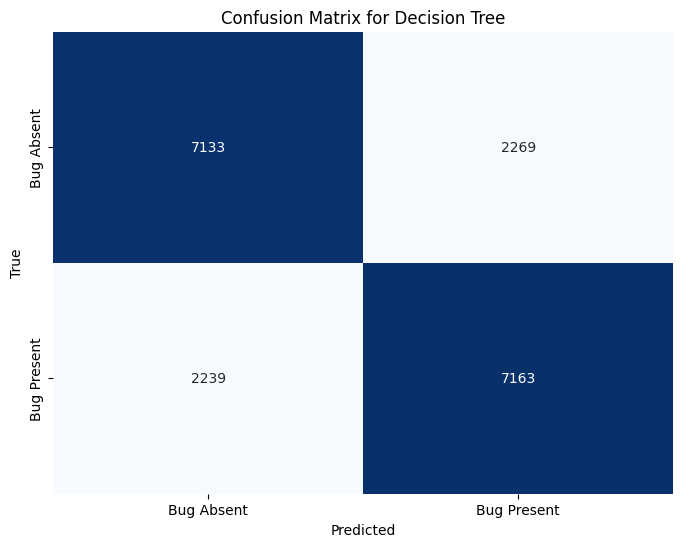

time: 206 ms (started: 2024-01-08 17:20:28 +00:00)


In [ ]:
confusion=confusion_matrix(y_test,result)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Bug Absent', 'Bug Present'], yticklabels=['Bug Absent', 'Bug Present'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')

plt.show()

In [ ]:
import joblib
joblib.dump(models,'/content/drive/MyDrive/CSE_4554_ML_PROJECT/dt_model.joblib')

['/content/drive/MyDrive/CSE_4554_ML_PROJECT/dt_model.joblib']

time: 1.25 s (started: 2024-01-08 17:20:28 +00:00)
